# SImple and fun neural network with PyTorch

## Training data


In [1]:
%matplotlib notebook
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import torch # Pytorch 

In [2]:
def func(x,y):
    """
    A rather complicated mathematical function
    """
    r = ((x**2 + y**2)**.5 ) + np.cos(x)
    out = np.exp(-r) - .02 + np.cos(x)/10 * np.sin(y /3)
    return out
    

<IPython.core.display.Javascript object>


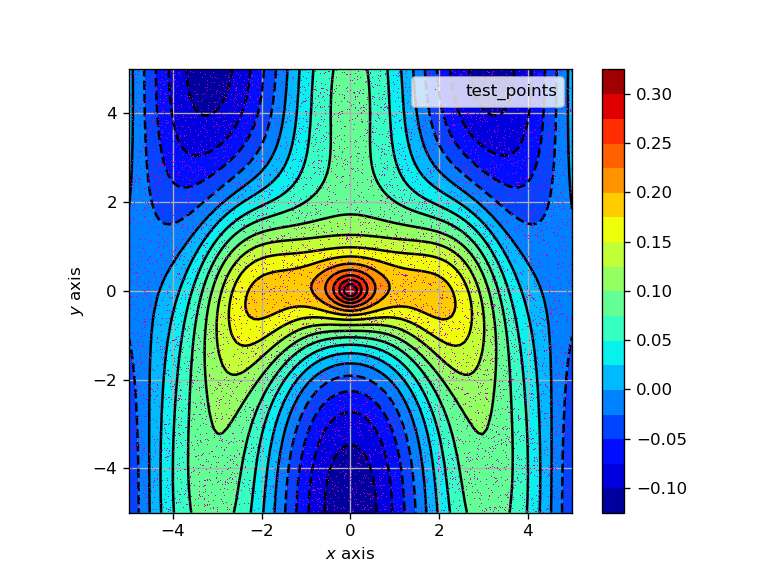

In [40]:
x = np.linspace(-5., 5., 100)
y = np.linspace(-5., 5., 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

# test points
Nt = 10000
xt = (np.random.rand(Nt) -.5)*10
yt = (np.random.rand(Nt) -.5)*10
zt = func(xt, yt)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect("equal")
plt.grid()
plt.contour(X, Y, Z, 20, colors = "black")
plt.contourf(X, Y, Z, 20, cmap = mpl.cm.jet)
plt.plot(xt, yt, ",m", label = "test_points")
plt.colorbar()
plt.legend(loc = "best")
plt.xlabel("$x$ axis")
plt.ylabel("$y$ axis")
plt.show()


## Creating a neural network

In [41]:
# The neural network will have to mimic the function "func"
# It has 2 inputs and 1 output
layers = [torch.nn.Linear(2, 5, bias = True), #First layer
          torch.nn.ELU(), # Activation function (RELU)
          torch.nn.Linear(5, 7, bias = True), 
          torch.nn.ELU(),
          torch.nn.Linear(7, 7, bias = True), 
          torch.nn.ELU(),
          torch.nn.Linear(7, 5, bias = True), 
          #torch.nn.ReLU(), # Activation function (RELU)
          torch.nn.ELU(),
          torch.nn.Linear(5, 1, bias = True), 
          #torch.nn.ReLU()
         ]
model = torch.nn.Sequential(*layers)
model

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=5, out_features=7, bias=True)
  (3): ELU(alpha=1.0)
  (4): Linear(in_features=7, out_features=7, bias=True)
  (5): ELU(alpha=1.0)
  (6): Linear(in_features=7, out_features=5, bias=True)
  (7): ELU(alpha=1.0)
  (8): Linear(in_features=5, out_features=1, bias=True)
)

In [42]:
pin = torch.Tensor( np.array([xt, yt]).T ) # Training points (inputs)
pout = torch.Tensor(zt.reshape(Nt, 1)) # Training outputs
model(pin) - pout

tensor([[-0.0492],
        [-0.1510],
        [-0.0966],
        ...,
        [-0.0716],
        [-0.1842],
        [-0.0068]], grad_fn=<SubBackward0>)

## Neural network training

In [43]:
loss_func = torch.nn.MSELoss(reduction = "sum") # Cost function
optimizer = torch.optim.Adam(model.parameters(), lr = 1.e-3 ) # lr: learning
for e in range(10000):
    y = model(pin)
    loss = loss_func(y , pout)
    optimizer.zero_grad() # Gradient is set to 0
    loss.backward() # Backwards propagation is used to compute the gradient
    optimizer.step() # Do an optimization step
    if e % 1000 == 0:
        print("Loss = ", loss.item())
    


Loss =  250.17831420898438
Loss =  3.9930548667907715
Loss =  2.371086597442627
Loss =  1.7301394939422607
Loss =  1.462167501449585
Loss =  1.3160135746002197
Loss =  1.175897240638733
Loss =  1.0446454286575317
Loss =  0.9116264581680298
Loss =  0.7932118773460388


## Check the results

In [44]:
pgrid = torch.Tensor(np.array([X.flatten(), Y.flatten()]).T)
outgrid = model(pgrid) # Model evaluation (inference)
Zmodel = outgrid.data.numpy().reshape(X.shape)

<IPython.core.display.Javascript object>


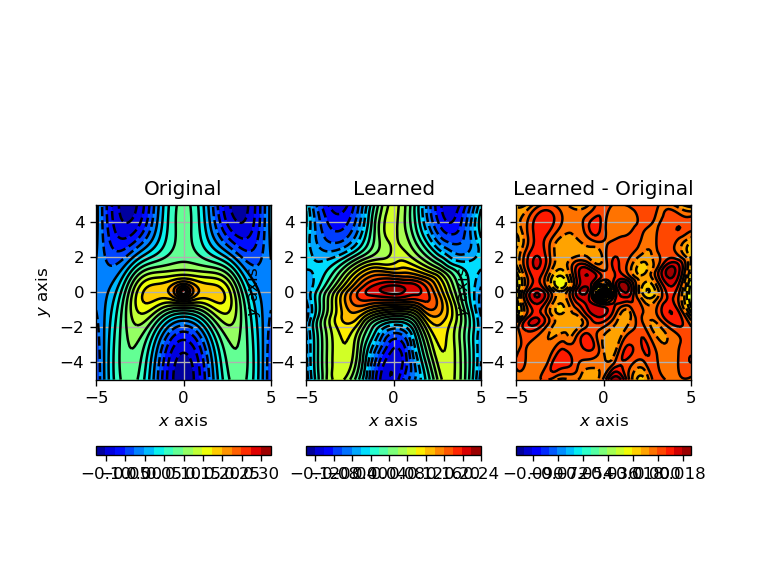

In [45]:
fig = plt.figure()
ax = fig.add_subplot(1,3,1)
ax.set_aspect("equal")
plt.grid()
ax.set_title("Original")
plt.contour(X, Y, Z, 20, colors = "black")
plt.contourf(X, Y, Z, 20, cmap = mpl.cm.jet)
#plt.plot(xt, yt, "+m", label = "test_points")
plt.colorbar(orientation = "horizontal")
#plt.legend(loc = "best")
plt.xlabel("$x$ axis")
plt.ylabel("$y$ axis")

ax = fig.add_subplot(1,3,2)
ax.set_aspect("equal")
plt.grid()
ax.set_title("Learned")
plt.contour(X, Y, Zmodel, 20, colors = "black")
plt.contourf(X, Y, Zmodel, 20, cmap = mpl.cm.jet)
#plt.plot(xt, yt, "+m", label = "test_points")
plt.colorbar(orientation = "horizontal")
#plt.legend(loc = "best")
plt.xlabel("$x$ axis")
plt.ylabel("$y$ axis")

ax = fig.add_subplot(1,3,3)
ax.set_aspect("equal")
plt.grid()
ax.set_title("Learned - Original")
plt.contour(X, Y, Zmodel-Z, 20, colors = "black")
plt.contourf(X, Y, Zmodel-Z, 20, cmap = mpl.cm.jet)
#plt.plot(xt, yt, "+m", label = "test_points")
plt.colorbar(orientation = "horizontal")
#plt.legend(loc = "best")
plt.xlabel("$x$ axis")
plt.ylabel("$y$ axis")
plt.show()


In [49]:
torch.save(model, "model.torch")

In [50]:
torch.load("model.torch")

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=5, out_features=7, bias=True)
  (3): ELU(alpha=1.0)
  (4): Linear(in_features=7, out_features=7, bias=True)
  (5): ELU(alpha=1.0)
  (6): Linear(in_features=7, out_features=5, bias=True)
  (7): ELU(alpha=1.0)
  (8): Linear(in_features=5, out_features=1, bias=True)
)